In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re


In [4]:

# Function to clean xtick labels by removing text after 'S' followed by numbers
def clean_xtick_label(label):
    # Remove leading underscores
    label = re.sub(r'^_', '', label)
    # Remove everything after 'S' followed by digits
    label = re.sub(r'_S\d+.*', '', label)
    return label

# Function to process the spreadsheet and plot the sorted histogram
def plot_sorted_histogram(file_path):
    # Load the spreadsheet
    spreadsheet = pd.read_excel(file_path, engine='openpyxl')

    # Sum each column (ignoring the 'miRNA' column)
    column_sums = spreadsheet.iloc[:, 1:].sum()

    # Define the ranges for the different runs based on columns
    run1_columns = spreadsheet.columns[1:31]  # B-AE (Run1)
    run2_columns = spreadsheet.columns[31:125]  # AE-DU (Run2)
    run3_columns = spreadsheet.columns[125:]  # Remaining columns (Run3)

    # Classify columns into runs
    run1_sums = column_sums[run1_columns]
    run2_sums = column_sums[run2_columns]
    run3_sums = column_sums[run3_columns]

    # Combine all columns and sort them
    all_sums = pd.concat([run1_sums, run2_sums, run3_sums]).sort_values()

    # Create colors based on the run the column belongs to
    colors = ['blue' if col in run1_columns else 'green' if col in run2_columns else 'red' for col in all_sums.index]



    # print("Run 1 Columns:", run1_columns,"len is ", len(run1_columns))
    # print("Run 2 Columns:", run2_columns, "len is ", len(run2_columns))
    # print("Run 3 Columns:", run3_columns, "len is ", len(run3_columns))

        # Plot the histogram
    plt.figure(figsize=(15, 8))
    plt.bar(all_sums.index, all_sums.values, color=colors)

    # Log scale for the y-axis
    plt.yscale('log')

    # Add labels and title
    plt.xlabel('Samples')
    plt.ylabel('Sum of miRNA Read Counts (log scale)')
    plt.title('Histogram of miRNA Read Counts in Each Sample (Log Scale)')

    # Clean the xtick labels
    cleaned_xticks = [clean_xtick_label(label) for label in all_sums.index]
    plt.xticks(np.arange(len(cleaned_xticks)), cleaned_xticks, rotation=90, fontsize=8)

    # Create a legend
    plt.legend(handles=[
        plt.Line2D([0], [0], color='blue', lw=4, label='Run1'),
        plt.Line2D([0], [0], color='green', lw=4, label='Run2'),
        plt.Line2D([0], [0], color='red', lw=4, label='Run3')
    ])

    # Show the plot
    plt.tight_layout()
    plt.show()
    # all_sums.to_csv('newsums2')
    output_data = pd.DataFrame({
        'Sample': all_sums.index,
        'Sum_of_Read_Counts': all_sums.values
    })

    output_file_path = 'sorted_mirna_read_counts.xlsx'
    output_data.to_excel(output_file_path, index=False)
    print(f"Sorted data has been exported to {output_file_path}")


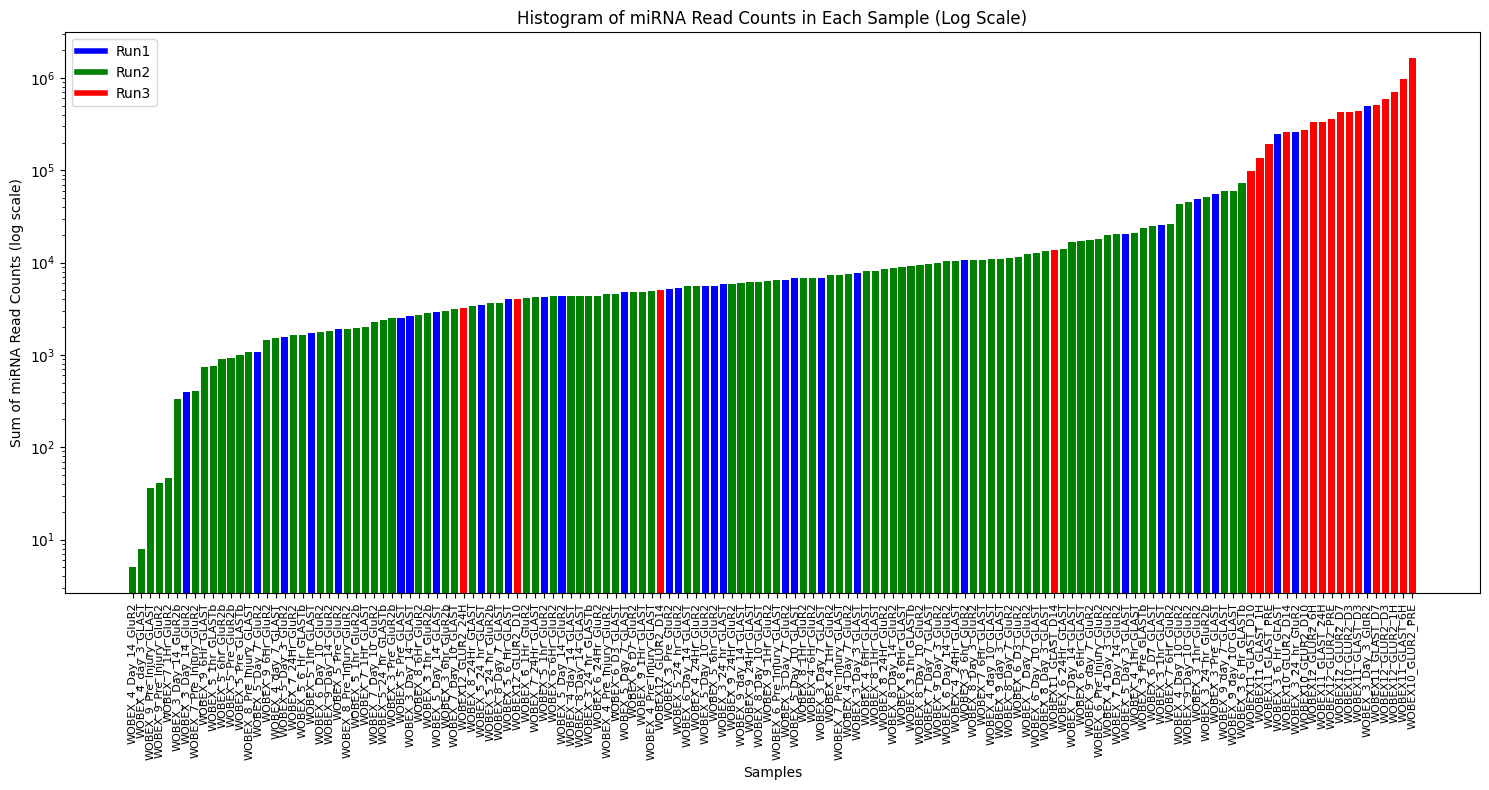

Sorted data has been exported to sorted_mirna_read_counts.xlsx


In [5]:
# Example usage:
file_path = 'All WOBEX RUNS 090424.xlsx'  # Replace with the actual path to your file
plot_sorted_histogram(file_path)

NameError: name 'all_sums' is not defined